<h1>Определение возраста покупателей<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Диаграммы-распределения-возраста" data-toc-modified-id="Диаграммы-распределения-возраста-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Диаграммы распределения возраста</a></span></li><li><span><a href="#Загрузка-и-печать-фотографий" data-toc-modified-id="Загрузка-и-печать-фотографий-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка и печать фотографий</a></span></li><li><span><a href="#Вывод-по-исследовательскому-анализу-данных" data-toc-modified-id="Вывод-по-исследовательскому-анализу-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Вывод по исследовательскому анализу данных</a></span></li></ul></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение модели</a></span><ul class="toc-item"><li><span><a href="#Результат-модели" data-toc-modified-id="Результат-модели-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Результат модели</a></span></li><li><span><a href="#Вывод-по-обучению-модели" data-toc-modified-id="Вывод-по-обучению-модели-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Вывод по обучению модели</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Общий вывод</a></span><ul class="toc-item"><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение модели</a></span></li></ul></li></ul></div>

# Описание проекта
Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:
- Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
- Контролировать добросовестность кассиров при продаже алкоголя.

Постройте модель, которая по фотографии определит приблизительный возраст человека. В вашем распоряжении набор фотографий людей с указанием возраста.

## Исследовательский анализ данных

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

from tensorflow.keras.layers import Dense, AvgPool2D, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50



from tensorflow.keras.layers import Dense, GlobalMaxPooling2D, GlobalAveragePooling2D, Conv2D, AvgPool2D, MaxPooling2D, Flatten


In [2]:
df = pd.read_csv('/datasets/faces/labels.csv')

In [3]:
print('Dataset shape: ', df.shape)

Dataset shape:  (7591, 2)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


**Вывод:** загружен датасет размерностью (7591, 2) данные соответствуют описанию и типам. Пропущенных значений не выявленно.

### Диаграммы распределения возраста

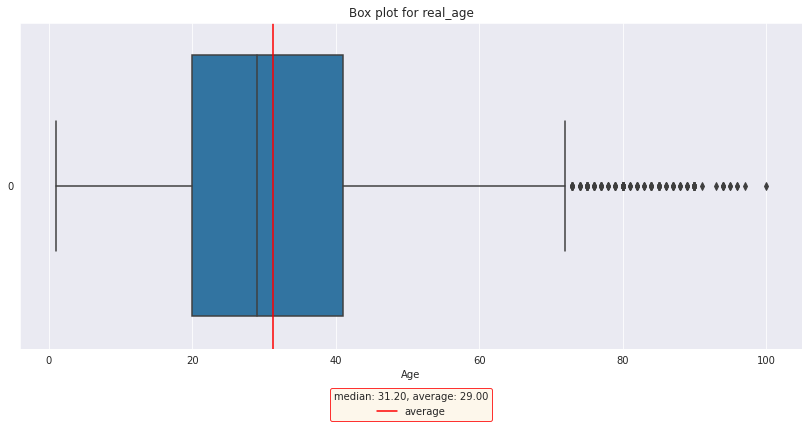

In [23]:
plt.figure(figsize=[14, 6])
plt.title(f'Box plot for real_age', fontsize=12)
sns.set_style('darkgrid')
sns.boxplot(data=df['real_age'], orient='h')
plt.axvline(np.mean(df['real_age']), 
            color='r', 
            linestyle='-',
            label='average')
median = np.mean(df['real_age'])
mean = np.median(df['real_age'])
plt.legend(title=f'median: {median:.2f}, average: {mean:.2f}', 
           loc='center', 
           edgecolor='r',
           facecolor='oldlace',
           bbox_to_anchor=(0.5, -0.17))
plt.xlabel('Age');

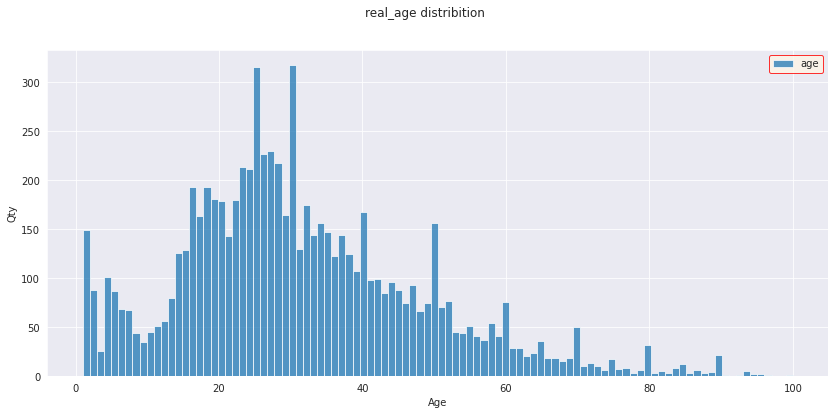

In [24]:
plt.figure(figsize=[14, 6])
plt.suptitle('real_age distribition', fontsize=12)
sns.set_style('darkgrid')
sns.histplot(data=df['real_age'], label='age', bins=100, kde=False)
plt.xlabel('Age')
plt.ylabel('Qty')
plt.grid(True)
plt.legend(edgecolor='r',
           facecolor='oldlace'
          )
plt.show();

**Вывод:** диаграмма распределения близка к нормальному, указывает на наличие выбросов в диапазоне после 65 лет. Значительная часть данных в диапазоне от 1 до 65 лет

### Загрузка и печать фотографий

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255)
train_datagen_flow = train_datagen.flow_from_dataframe(dataframe=df,
                                                      directory='/datasets/faces/final_files/',
                                                      x_col='file_name',
                                                      y_col='real_age',
                                                      target_size=(224,224),
                                                      batch_size=32,
                                                      class_mode='raw',
                                                      seed = 12345)

Found 7591 validated image filenames.


In [16]:
features, target = next(train_datagen_flow)

In [17]:
print('Features shape: ', features.shape)

Features shape:  (32, 224, 224, 3)


Получились признаки — четырёхмерный тензор, в котором 32 изображения размером 224x224 с тремя цветовыми каналами.

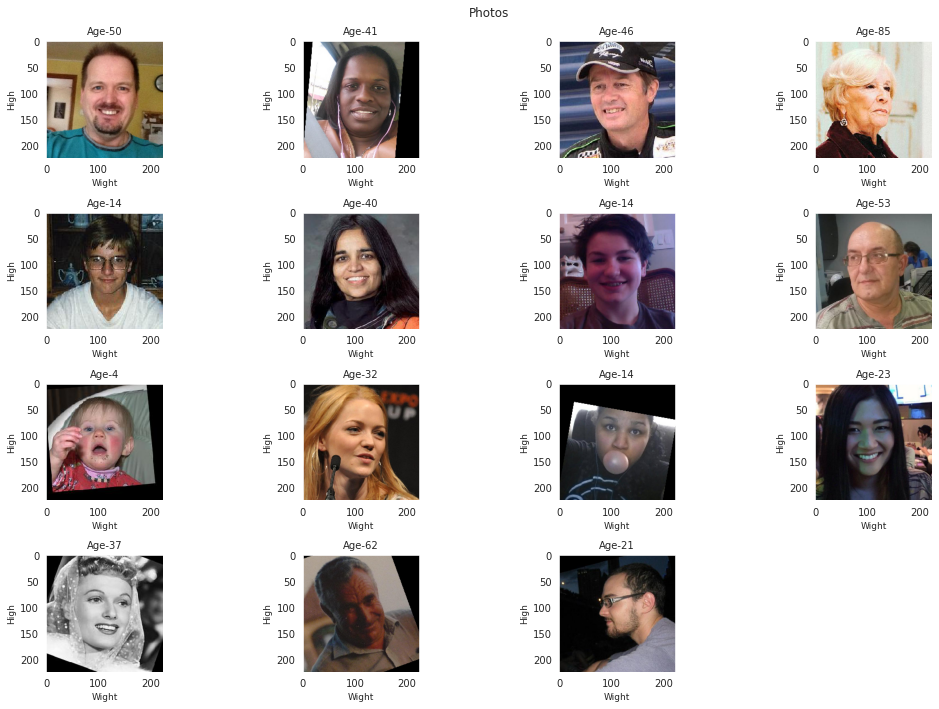

In [18]:
fig = plt.figure(figsize=(15,10))
plt.subplots_adjust(top=0.90, wspace=0.3, hspace=0.95)
for i in range(15):
    plt.suptitle('Photos', fontsize=12)
    fig.add_subplot(4,4, i+1)
    plt.title(f'Age-{target[i]}', fontsize=10)
    plt.imshow(features[i])
    plt.grid(False)
    plt.ylabel('High', fontsize=9)
    plt.xlabel('Wight', fontsize=9)
plt.tight_layout()

### Вывод по исследовательскому анализу данных

1. Загружен датасет размерностью (7591, 2) данные соответствуют описанию и типам. Пропущенных значений не выявленно

2. Диаграмма распределения близка к нормальному, указывает на наличие выбросов в диапазоне после 65 лет. Значительная часть данных в диапазоне от 1 до 65 лет

3. Датасет содержит цветные и черно-белые фотографии, данные приведены к одному размеру

4. Получились признаки — четырёхмерный тензор, в котором 32 изображения размером 224x224 с тремя цветовыми каналами.

## Обучение модели

In [19]:
def load_train(path):
    df = pd.read_csv(path + 'labels.csv')
    train_datagen = ImageDataGenerator(rescale=1./255,
                                       horizontal_flip=True,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       validation_split=0.25
                                       )
    train_datagen_flow = train_datagen.flow_from_dataframe(
        dataframe = df,
        directory = path + 'final_files',
        x_col = 'file_name',
        y_col = 'real_age',
        class_mode = 'raw',
        target_size = (150, 150),
        batch_size = 32,
        subset='training',
        seed=12345
        )
    return train_datagen_flow
 
def load_test(path):
    df = pd.read_csv(path + 'labels.csv')
    test_datagen = ImageDataGenerator(rescale=1./255,
                                      validation_split=0.25
                                     )
    test_datagen_flow = test_datagen.flow_from_dataframe(
        dataframe = df,
        directory = path + 'final_files',
        x_col = 'file_name',
        y_col = 'real_age',
        class_mode = 'raw',
        target_size = (150, 150),
        batch_size = 32,
        subset='validation',
        seed=12345
        )
    return test_datagen_flow
 

def create_model(input_shape):
    backbone = ResNet50(input_shape=input_shape, 
                        weights='imagenet',
                        include_top=False
                       )
    optimizer = Adam(lr=0.0001)
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu')) 
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error',
                  metrics=['mae']
                 )
    return model

def train_model(model, train_data, test_data, batch_size=32, epochs=10,
                steps_per_epoch=None, validation_steps=None):
    model.fit(train_data,
              validation_data=test_data,
              epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2,
              shuffle=True
              )
    return model

### Результат модели

Train for 178 steps, validate for 60 steps

Epoch 1/10

2024-07-11 07:30:33.375367: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10

2024-07-11 07:30:33.724569: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7

178/178 - 81s - loss: 255.1425 - mae: 11.5922 - val_loss: 810.5313 - val_mae: 23.5647

Epoch 2/10

178/178 - 72s - loss: 103.9086 - mae: 7.7156 - val_loss: 589.1362 - val_mae: 19.0175

Epoch 3/10

178/178 - 76s - loss: 80.6247 - mae: 6.8266 - val_loss: 286.9709 - val_mae: 12.9013

Epoch 4/10

178/178 - 77s - loss: 65.6931 - mae: 6.2212 - val_loss: 138.2574 - val_mae: 8.8633

Epoch 5/10

178/178 - 74s - loss: 54.6081 - mae: 5.6904 - val_loss: 114.1752 - val_mae: 7.7360

Epoch 6/10

178/178 - 73s - loss: 48.7293 - mae: 5.4132 - val_loss: 95.3497 - val_mae: 7.1798

Epoch 7/10

178/178 - 72s - loss: 41.8541 - mae: 4.9922 - val_loss: 172.6322 - val_mae: 9.7095

Epoch 8/10

178/178 - 72s - loss: 37.7249 - mae: 4.7092 - val_loss: 99.7526 - val_mae: 7.5299

Epoch 9/10

178/178 - 73s - loss: 31.6171 - mae: 4.3647 - val_loss: 82.5376 - val_mae: 6.7095

Epoch 10/10

178/178 - 72s - loss: 31.5082 - mae: 4.3064 - val_loss: 81.4023 - val_mae: 6.6476

WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
  
**60/60 - 11s - loss: 81.4023 - mae: 6.6476**

**Test MAE: 6.6476**

### Вывод по обучению модели

1. Для работы с проектом была использована модель сверточной нейронной сети на ResNet50 с оптимизацией алгоритмом Adam(lr=0.0001)

2. Модель обучена, достигнут результат отметки MAE ниже 7, что соответствует условиям задачи

## Общий вывод

### Исследовательский анализ данных

1. Загружен датасет размерностью (7591, 2) данные соответствуют описанию и типам. Пропущенных значений не выявленно

2. Диаграмма распределения близка к нормальному, указывает на наличие выбросов в диапазоне после 65 лет. Значительная часть данных в диапазоне от 1 до 65 лет

3. Датасет содержит цветные и черно-белые фотографии, данные приведены к одному размеру

4. Получились признаки — четырёхмерный тензор, в котором 32 изображения размером 224x224 с тремя цветовыми каналами.

### Обучение модели

1. Для работы с проектом была использована модель сверточной нейронной сети на ResNet50 с оптимизацией алгоритмом Adam(lr=0.0001)

2. Модель обучена, достигнут результат отметки MAE ниже 7, что соответствует условиям задачи

3. Модель может частично решить задачу бизнеса, так как ошибка все-же может давать завышенное значение возраста, при этом лучше допустить ошибку в меньшую сторону, чем продать алкоголь человеку с возрастом менее 18 лет